In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [2]:
cd "/content/drive/My Drive/Colab Notebooks/dw_matrix"

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [0]:
ls data

In [5]:
ls

data/  Day3_matrix_one/  HelloGithub.ipynb  LICENSE  README.md


In [6]:
ls data

men_shoes.csv


In [8]:
df=pd.read_csv('data/men_shoes.csv', low_memory=False)
df.shape

(18280, 48)

In [9]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [0]:
mean_price = np.mean( df['prices_amountmin'])

In [11]:
mean_price

93.53952188183217

In [13]:
[3]*5

[3, 3, 3, 3, 3]

In [16]:
df['prices_amountmin']

0        39.89
1        51.99
2        40.02
3        50.31
4        46.26
         ...  
18275    29.95
18276    64.95
18277    32.48
18278    31.48
18279    72.00
Name: prices_amountmin, Length: 18280, dtype: float64

In [17]:
y_true = df['prices_amountmin']
y_pred = [mean_price] * y_true.shape[0]

mean_absolute_error(y_true,y_pred)

63.968341227870624

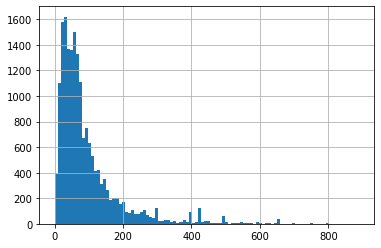

In [18]:
df['prices_amountmin'].hist(bins=100)

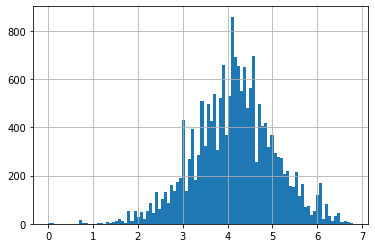

In [19]:
np.log1p( df['prices_amountmin'] ).hist(bins=100)

In [20]:
y_true = df['prices_amountmin']
y_pred = [np.median(y_true)] * y_true.shape[0]

mean_absolute_error(y_true,y_pred)

58.01120240700219

In [29]:
y_true = df['prices_amountmin']
price_log_mean = np.expm1(np.mean( np.log1p(y_true)))
y_pred = [price_log_mean] * y_true.shape[0]

mean_absolute_error(y_true,y_pred)

58.03539547661041

In [30]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [32]:
df.brand.value_counts()

Nike                      1709
PUMA                       574
Ralph Lauren               524
New Balance                361
VANS                       356
                          ... 
Otomix                       1
Wilsons Leather              1
rag & bone                   1
Zoot Sports                  1
Principle Plastics Inc       1
Name: brand, Length: 1856, dtype: int64

In [34]:
df['brand'].factorize()[0]

array([  0,   0,   1, ..., 411, 411, 411])

In [0]:
df['brand_cat'] = df['brand'].factorize()[0]

In [39]:
feats = ['brand_cat']
X = df[ feats ].values
y = df['prices_amountmin'].values

model = DecisionTreeRegressor(max_depth=5)

scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-58.38655694633361, 4.223555478221712)

In [0]:
def run_model(feats):
      X = df[ feats ].values
      y = df['prices_amountmin'].values

      model = DecisionTreeRegressor(max_depth=5)

      scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
      return np.mean(scores), np.std(scores)      

In [48]:
run_model(['brand_cat'])

(-58.38655694633361, 4.223555478221712)

In [49]:
df.prices_offer.value_counts()

winning bid              1258
REDUCED                   510
REDUCED USD 30.01          55
REDUCED USD 15.01          54
CLEARANCE USD 30.01        47
                         ... 
REDUCED USD 14.90           1
REDUCED USD 72.01           1
REDUCED USD 146.02          1
REDUCED USD 146.00          1
SAVINGS_AMT USD 22.11       1
Name: prices_offer, Length: 1196, dtype: int64

In [50]:
df['prices_offer'].factorize()[0]

array([ 0,  0, -1, ..., -1, -1, -1])

In [0]:
df['prices_offer_cat'] = df['prices_offer'].factorize()[0]

In [52]:
run_model(['brand_cat','prices_offer_cat'])

(-58.78150844098093, 4.615075682433954)

In [53]:
df.sizes.value_counts()

10                                                                                                         266
11                                                                                                         264
9                                                                                                          233
12                                                                                                         180
8                                                                                                          167
                                                                                                          ... 
7,6,5                                                                                                        1
8W,11W,9W,12W,13W,8.5M,11.5M,9M,8M,9.5M,10.5M,10W,8.5W,14M,7M,7.5M,15M,9.5W,11M,10.5W,10M,13M,11.5W,12M      1
10,9.5,11.5,13                                                                                               1
7

In [54]:
df.prices_issale.value_counts()

False    12731
True      5549
Name: prices_issale, dtype: int64

In [55]:
df.reviews.value_counts()

[{"date":"2015-04-16T00:00:00Z","dateAdded":"2015-12-02T20:57:10Z","dateSeen":["2016-04-02T00:00:00Z"],"rating":5.0,"sourceURLs":["http://www.amazon.com/Fizik-Mens-Cycling-Shoes-White/dp/B00IYRV0F0","https://www.amazon.com/Fizik-Mens-Cycling-Shoes-White/dp/B00IYRV0F0"],"text":"These shoes are a joy to wear. The toe box is roomy enough that I don't suffer the years of abuse heaped on myself by shoes that don't fit right. For me, I tighten the center strap first, then the the top strap, and then the toe strap. When I tighten it this way my foot doesn't move during the pedal stroke.","title":"Toe Approved!","username":"Franz Bose"},{"date":"2015-06-05T00:00:00Z","dateAdded":"2015-12-02T20:57:10Z","dateSeen":["2016-05-14T00:00:00Z"],"rating":4.0,"sourceURLs":["http://www.amazon.com/Fizik-Mens-Cycling-Shoes-White/dp/B00IYRV0F0"],"text":"Very good!!","title":"Four Stars","username":"HONGSEO HA"},{"date":"2015-06-05T00:00:00Z","dateAdded":"2015-12-02T20:57:10Z","dateSeen":["2015-10-02T00:00:0

In [56]:
df.manufacturer.value_counts()

Puma                      476
Nike                      374
New Balance               249
VANS                      170
Reebok                    128
                         ... 
Marcolin                    1
Zoot Sports                 1
2(x)ist                     1
Outdoor Cap                 1
Principle Plastics Inc      1
Name: manufacturer, Length: 618, dtype: int64

In [0]:
df['manufacturer_cat'] = df['manufacturer'].factorize()[0]

In [58]:
run_model(['brand_cat','manufacturer_cat'])

(-58.53930419908595, 4.311223231615431)

In [59]:
ls

data/  Day3_matrix_one/  HelloGithub.ipynb  LICENSE  README.md


In [60]:
cd ..

/content/drive/My Drive/Colab Notebooks


In [61]:
ls

 ColabDriveGithub.ipynb             day4.ipynb         day4_meta.ipynb
'Copy of Welcome To Colaboratory'   day4_meta2.ipynb   dw_matrix/


In [64]:
!git add 'Colab Notebooks'/day4.ipynb

fatal: not a git repository (or any parent up to mount point /content)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).


In [0]:
#GITHUB_TOKEN = "aae685724425cbff8f65c8e2ff8985897bd6ef38"

#GITHUB_URL = 'https://{0}@github.com/Rosenzweigova/dw_matrix.git'.format(GITHUB_TOKEN)

In [67]:
#GITHUB_URL

'https://aae685724425cbff8f65c8e2ff8985897bd6ef38@github.com/Rosenzweigova/dw_matrix.git'

In [70]:
ls

 ColabDriveGithub.ipynb             day4.ipynb         day4_meta.ipynb
'Copy of Welcome To Colaboratory'   day4_meta2.ipynb   dw_matrix/


In [71]:
cd dw_matrix/

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [72]:
ls

data/  Day3_matrix_one/  HelloGithub.ipynb  LICENSE  README.md


In [73]:
cd ..

/content/drive/My Drive/Colab Notebooks


In [74]:
ls

 ColabDriveGithub.ipynb             day4.ipynb         day4_meta.ipynb
'Copy of Welcome To Colaboratory'   day4_meta2.ipynb   dw_matrix/


In [75]:
!git add day4.ipynb

fatal: not a git repository (or any parent up to mount point /content)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).
